In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
df = pd.read_csv('epistatsis_in_aurora2_for_violins.csv', index_col=0)

In [4]:
df.head()

,mut,log_cpm_ratio
0,4-45|AT>GA,-1.686705
1,4-45|AT>GA,-0.999760
2,4-45|AT>GA,-1.213520
3,4-45|AT>GA,-1.391848
4,4-45|AT>GA,-1.113390


In [6]:
with open('../../prep/mutations_permutations_aurora2.pkl', mode='rb') as mf:
    mutations, mutations_names = pkl.load(mf)

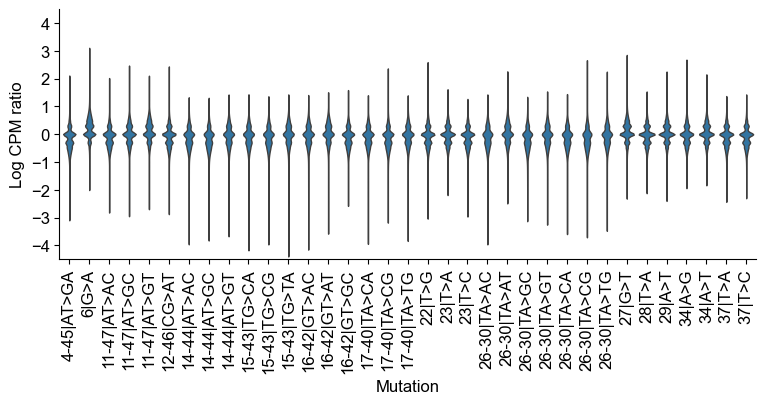

In [10]:
# Define absolute axis size in inches
axis_width = 6.968  # Width in inches
axis_height = 2.5  # Height in inches
w = 2
a = 0.3

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

sns.violinplot(data=df, x='mut', y='log_cpm_ratio',
               bw_adjust=3,
               inner=None,
               linewidth=1,
               order=mutations_names
              )

#sns.boxplot(data=df, x="mut", y="log_cpm_ratio", showcaps=False, boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0}, flierprops={'marker': 'o', 'color': 'red', 'markersize': 1})

plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4.5, 4.5)

plt.xlabel('Mutation')
plt.ylabel('Log CPM ratio')
plt.xticks(rotation=90)
#plt.xlim(-2, 3.5)
#plt.ylim(-1.5, 4)
#plt.xticks([0, 5, 10, 15])
#plt.yticks([0, 1, 2, 3])

sns.despine()
plt.savefig('general_epistasis.svg')